In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from scipy.special import expit, logit

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import scipy.stats as scst

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print(os.getcwd())
os.chdir("/content/drive/My Drive/fyp")
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive/fyp


In [3]:
train_df = pd.read_csv('train_new.csv')
test_df = pd.read_csv('test_new.csv')

In [4]:
X_train = train_df.drop(['Unnamed: 0', 'fraction', 'file_origin', '4_49653612-49665611'], axis = 1)
y_train = train_df['fraction']
X_test = test_df.drop(['Unnamed: 0', 'fraction', 'file_origin', '4_49653612-49665611'], axis = 1)
y_test = test_df['fraction']

In [6]:
y_train_logit = logit(y_train + 0.01)
y_test_logit = logit(y_test + 0.01)

In [8]:
!git clone https://github.com/scikit-learn-contrib/stability-selection.git

fatal: destination path 'stability-selection' already exists and is not an empty directory.


In [9]:
%cd stability-selection/

/content/drive/MyDrive/fyp/stability-selection


In [10]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing stability_selection.egg-info/PKG-INFO
writing dependency_links to stability_selection.egg-info/dependency_links.txt
writing requirements to stability_selection.egg-info/requires.txt
writing top-level names to stability_selection.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'stability_selection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/stability_selection
copying build/lib/stability_selection/__init__.py -> build/bdist.linux-x86_64/egg/stability_selection
copying build/lib

In [11]:
import joblib
import sklearn.linear_model._base
import sys
sys.modules['sklearn.externals.joblib'] = joblib
sys.modules['sklearn.linear_model.base'] = sklearn.linear_model._base

In [12]:
from stability_selection import StabilitySelection

In [13]:
ls = Lasso(max_iter = 10000, alpha = 0.001)
ls.fit(X_train, y_train_logit)
ls.coef_

array([-0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  1.46894511, -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.03392929, -0.        ,
        0.        , -0.        ,  1.42319416,  0.59196162, -0.73527282,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.40687818,  0.49918213,  0.        ,  0.        ,  0.        ,
       -0.86547412,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -1.98517031,  0.        ,
       -2.57278284, -0.17690856,  0.        , -3.36528601, -1.19579816,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.  

In [14]:
y_pred_train = ls.predict(X_train)
y_pred_train_correctzero = y_pred_train
y_pred_train_correctzero[y_pred_train_correctzero < 0] = 0
train_mae = mean_absolute_error(y_train, y_pred_train_correctzero)
train_mae

0.1756004587236497

In [15]:
y_pred_test = ls.predict(X_test)
y_pred_test_correctzero = y_pred_test
y_pred_test_correctzero[y_pred_test_correctzero < 0] = 0
test_mae = mean_absolute_error(y_test, y_pred_test_correctzero)
test_mae

0.3162684130100839

In [16]:
base_estimator = Lasso(max_iter=50000, selection='random')

In [88]:
selector = StabilitySelection(base_estimator = base_estimator, lambda_name = 'alpha', n_bootstrap_iterations = 1000, \
                              sample_fraction = 0.05, threshold = 0.9, \
                              lambda_grid = np.array([0.001]),
                              random_state = 25).fit(X_train, y_train_logit)

In [89]:
scores = pd.DataFrame(selector.stability_scores_)
scores.sort_values(by = 0, ascending = False)

,0
132,0.998
50,0.977
53,0.960
48,0.932
130,0.931
...,...
11,0.000
107,0.000
108,0.000
111,0.000


In [90]:
rank_index = list(scores.sort_values(by = 0, ascending = False).index)

In [91]:
X_train_one = X_train.iloc[:,rank_index[0:1]]
X_test_one = X_test.iloc[:,rank_index[0:1]]
X_train_two = X_train.iloc[:,rank_index[0:2]]
X_test_two = X_test.iloc[:,rank_index[0:2]]
X_train_three = X_train.iloc[:,rank_index[0:3]]
X_test_three = X_test.iloc[:,rank_index[0:3]]
X_train_four = X_train.iloc[:,rank_index[0:4]]
X_test_four = X_test.iloc[:,rank_index[0:4]]
X_train_five = X_train.iloc[:,rank_index[0:5]]
X_test_five = X_test.iloc[:,rank_index[0:5]]
X_train_six = X_train.iloc[:,rank_index[0:6]]
X_test_six = X_test.iloc[:,rank_index[0:6]]
X_train_seven = X_train.iloc[:,rank_index[0:7]]
X_test_seven = X_test.iloc[:,rank_index[0:7]]
X_train_eight = X_train.iloc[:,rank_index[0:8]]
X_test_eight = X_test.iloc[:,rank_index[0:8]]
X_train_nine = X_train.iloc[:,rank_index[0:9]]
X_test_nine = X_test.iloc[:,rank_index[0:9]]
X_train_ten = X_train.iloc[:,rank_index[0:10]]
X_test_ten = X_test.iloc[:,rank_index[0:10]]
X_train_eleven = X_train.iloc[:,rank_index[0:11]]
X_test_eleven = X_test.iloc[:,rank_index[0:11]]
X_train_twelve = X_train.iloc[:,rank_index[0:12]]
X_test_twelve = X_test.iloc[:,rank_index[0:12]]
X_train_thirteen = X_train.iloc[:,rank_index[0:13]]
X_test_thirteen = X_test.iloc[:,rank_index[0:13]]
X_train_fourteen = X_train.iloc[:,rank_index[0:14]]
X_test_fourteen = X_test.iloc[:,rank_index[0:14]]
X_train_fifteen = X_train.iloc[:,rank_index[0:15]]
X_test_fifteen = X_test.iloc[:,rank_index[0:15]]
X_train_sixteen = X_train.iloc[:,rank_index[0:16]]
X_test_sixteen = X_test.iloc[:,rank_index[0:16]]
X_train_seventeen = X_train.iloc[:,rank_index[0:17]]
X_test_seventeen = X_test.iloc[:,rank_index[0:17]]
X_train_eighteen = X_train.iloc[:,rank_index[0:18]]
X_test_eighteen = X_test.iloc[:,rank_index[0:18]]
X_train_nineteen = X_train.iloc[:,rank_index[0:19]]
X_test_nineteen = X_test.iloc[:,rank_index[0:19]]
X_train_twenty = X_train.iloc[:,rank_index[0:20]]
X_test_twenty = X_test.iloc[:,rank_index[0:20]]

In [130]:
list_of_X_dataset = [[X_train_one, X_test_one], [X_train_two, X_test_two],\
                     [X_train_three, X_test_three],[X_train_four, X_test_four],\
                     [X_train_five, X_test_five], [X_train_six, X_test_six],\
                     [X_train_seven, X_test_seven], [X_train_eight, X_test_eight],\
                     [X_train_nine, X_test_nine], [X_train_ten, X_test_ten]]#, \
                     #[X_train_eleven, X_test_eleven], [X_train_twelve, X_test_twelve], \
                     #[X_train_thirteen, X_test_thirteen], [X_train_fourteen, X_test_fourteen], \
                     #[X_train_fifteen, X_test_fifteen], [X_train_sixteen, X_test_sixteen], \
                     #[X_train_seventeen, X_test_seventeen], [X_train_eighteen, X_test_eighteen], \
                     #[X_train_nineteen, X_test_nineteen], [X_train_twenty, X_test_twenty]]

In [131]:
def generate_validation_table(list_of_X_dataset, y_train, y_test):
  list_cv_score = []
  list_train_mae_mean = []
  list_test_mae_mean = []

  for X_train, X_test in list_of_X_dataset:
    sub_list_train_mae = []
    sub_list_test_mae = []

    lr = Ridge(alpha=10)
    scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    list_cv_score.append(-scores.mean()*100)

    lr = Ridge(alpha=10).fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_train_correctzero = y_pred_train
    y_pred_train_correctzero[y_pred_train_correctzero < 0] = 0
    train_mae = mean_absolute_error(y_train, y_pred_train_correctzero)
    sub_list_train_mae.append(train_mae*100)

    y_pred_test = lr.predict(X_test)
    y_pred_test_correctzero = y_pred_test
    y_pred_test_correctzero[y_pred_test_correctzero < 0] = 0
    test_mae = mean_absolute_error(y_test, y_pred_test_correctzero)
    sub_list_test_mae.append(test_mae*100)
    
    list_train_mae_mean.append(np.mean(sub_list_train_mae))
    list_test_mae_mean.append(np.mean(sub_list_test_mae))

  validation_table = pd.DataFrame({'cv_score': list_cv_score, 'train_mae': list_train_mae_mean, 'test_mae': list_test_mae_mean})
  
  fig = plt.figure()
  x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] #, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
  default_x_ticks = range(len(x))
  plt.plot(default_x_ticks, list_cv_score, label = 'cv_score')
  plt.plot(default_x_ticks, list_train_mae_mean, label ='train_mae')
  plt.plot(default_x_ticks, list_test_mae_mean, label ='test_mae')
  plt.xticks(default_x_ticks, x)
  plt.legend(loc ='upper right')
  plt.title('MAE of models with different number of stable features')
  plt.show()
  plt.savefig('MAE.png')

  return validation_table

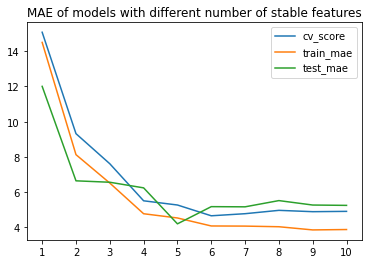

<Figure size 432x288 with 0 Axes>

In [132]:
table = generate_validation_table(list_of_X_dataset, y_train, y_test)

In [113]:
table

,cv_score,train_mae,test_mae
0,15.076259,14.499593,12.006458
1,9.321926,8.130695,6.646575
2,7.614802,6.519041,6.565987
3,5.513240,4.778979,6.247201
4,5.274669,4.538900,4.206096
5,4.662886,4.085248,5.181363
6,4.781462,4.077435,5.171336
7,4.971531,4.041683,5.524729
8,4.895878,3.861335,5.272912
9,4.913966,3.883200,5.253586


In [ ]:
0: 4.79
5: 4.68
10: 4.66
15: 4.67
20: 4.73
30: 4.87

In [114]:
rg = Ridge(alpha = 10)
rg.fit(X_train_six, y_train)

Ridge(alpha=10)

In [115]:
rg.coef_

array([-0.18341061, -0.39990823, -0.27379162, -0.31457506, -0.07009802,
       -0.19059131])

In [116]:
y_pred_train = rg.predict(X_train_six)
y_pred_train_correctzero = y_pred_train
y_pred_train_correctzero[y_pred_train_correctzero < 0] = 0
train_mae = mean_absolute_error(y_train, y_pred_train_correctzero)
train_mae

0.04085248322674655

In [117]:
y_pred_test = rg.predict(X_test_six)
y_pred_test_correctzero = y_pred_test
y_pred_test_correctzero[y_pred_test_correctzero<0] = 0
test_mae = mean_absolute_error(y_test, y_pred_test_correctzero)
test_mae

0.05181363400388225

In [118]:
scst.pearsonr(y_pred_train, y_train)

(0.9651308180905779, 0.0)

In [119]:
scst.pearsonr(y_pred_test, y_test)

(0.971038349153495, 0.0)

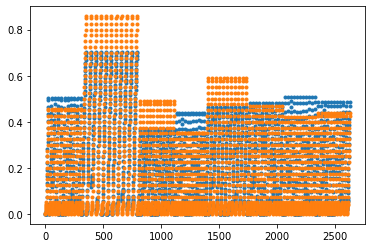

In [120]:
plt.plot(y_pred_train,'.')
plt.plot(y_train,'.')

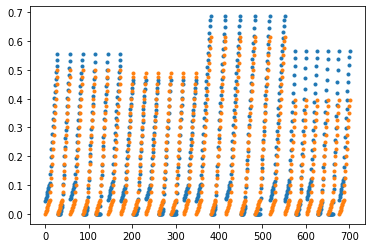

In [121]:
plt.plot(y_pred_test,'.')
plt.plot(y_test.reset_index()['fraction'],'.')

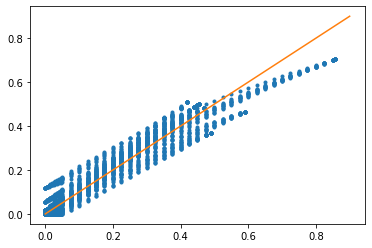

In [122]:
plt.plot(y_train, y_pred_train, '.')
plt.plot([0, 0.9], [0, 0.9])

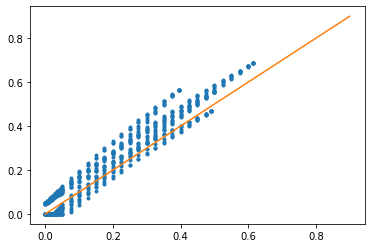

In [123]:
plt.plot(y_test, y_pred_test, '.')
plt.plot([0, 0.9], [0, 0.9])

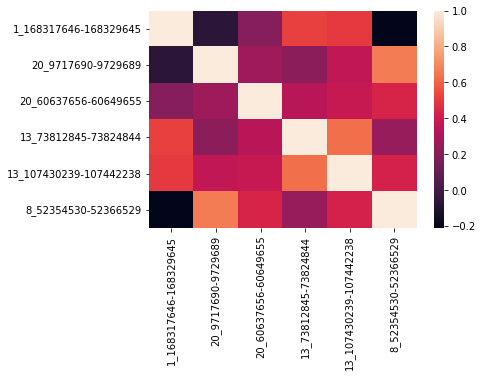

In [124]:
sns.heatmap(X_train_six.corr())

In [125]:
X_train_six.corr()

,1_168317646-168329645,20_9717690-9729689,20_60637656-60649655,13_73812845-73824844,13_107430239-107442238,8_52354530-52366529
1_168317646-168329645,1.000000,-0.072412,0.198470,0.512531,0.502686,-0.212058
20_9717690-9729689,-0.072412,1.000000,0.270311,0.215790,0.361634,0.666186
20_60637656-60649655,0.198470,0.270311,1.000000,0.341512,0.381153,0.435093
13_73812845-73824844,0.512531,0.215790,0.341512,1.000000,0.632198,0.243546
13_107430239-107442238,0.502686,0.361634,0.381153,0.632198,1.000000,0.425017
8_52354530-52366529,-0.212058,0.666186,0.435093,0.243546,0.425017,1.000000


In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [135]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_six.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_six.values, i)
                          for i in range(len(X_train_six.columns))]

In [136]:
vif_data

,feature,VIF
0,1_168317646-168329645,71.938247
1,20_9717690-9729689,40.192183
2,20_60637656-60649655,61.765206
3,13_73812845-73824844,49.206479
4,13_107430239-107442238,142.545364
5,8_52354530-52366529,51.328908
